In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('car data.csv')







In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


SOME EDA ON OUR DATASET

check for if there are empty data or not!

In [15]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [16]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

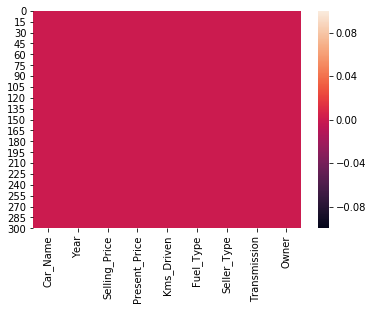

In [17]:
sns.heatmap(df.isnull())

so we confirmed , we have no missing data

since our target columns is 'Selling_Price' , we would se how it is affected by other variables

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

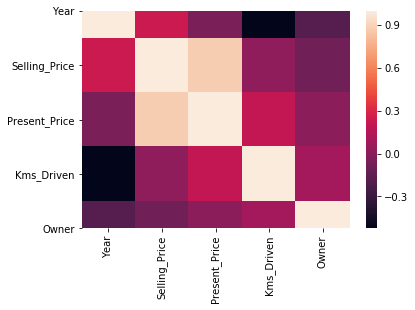

In [19]:
sns.heatmap(df.corr())

Text(0, 0.5, 'Selling Price')

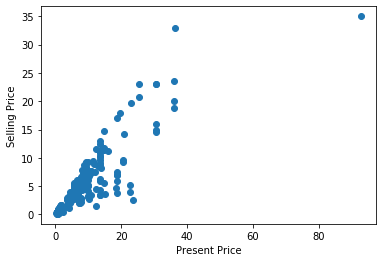

In [20]:
plt.scatter(df['Present_Price'],df['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

as we know this is positively co-related data so as the 'present price' is increased thus 'selling price' would also increase 

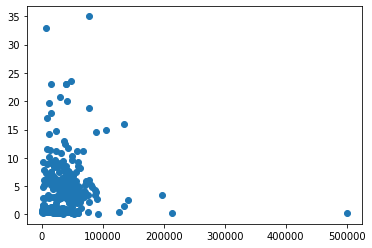

In [21]:
plt.scatter(df['Kms_Driven'],df['Selling_Price'])

# NUMERICAL FEATURES

In [22]:
#list of numerical values
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('number of numerical variables', len(numerical_features))
print('total features ',len(df.columns))

df[numerical_features].head()

number of numerical variables 5
total features  9


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


YEAR FEATURE

Text(0, 0.5, 'Selling Price')

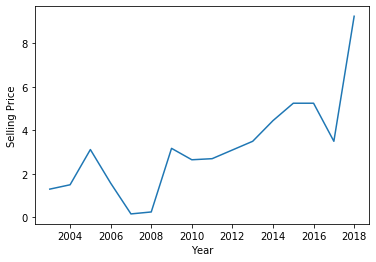

In [23]:
df.groupby('Year')['Selling_Price'].median().plot()
plt.xlabel('Year')
plt.ylabel('Selling Price')

but since currently we are in year 2020 so we would just see the year difference and see how prices are varying with the year difference

In [24]:
df['year_diff'] = 2020 - df['Year']
df = df.drop('Year',axis=1)
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_diff
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


visualisng how the years are varying with selling price

Text(0, 0.5, 'Selling Price')

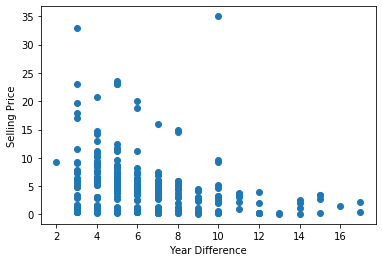

In [25]:
plt.scatter(df['year_diff'],df['Selling_Price'])
plt.xlabel('Year Difference')
plt.ylabel('Selling Price')

# DISCRETE AND CONTINOUS NUMERICAL FEATURES

we can see that dicrete feature in numerical feature is only Owner

Text(0, 0.5, 'Selling price')

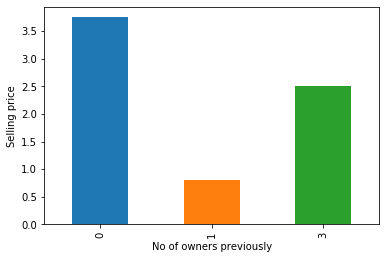

In [26]:
data = df.copy()
data.groupby(df['Owner'])['Selling_Price'].median().plot.bar()
plt.xlabel('No of owners previously')
plt.ylabel('Selling price')

now we would see continous features 

In [27]:
continous_feature = [df['Kms_Driven'],df['year_diff'],df['Present_Price']]

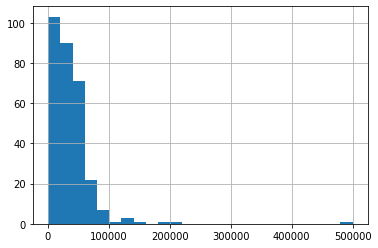

In [28]:
df['Kms_Driven'].hist(bins=25)

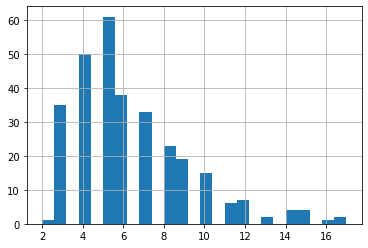

In [29]:
df['year_diff'].hist(bins=25)

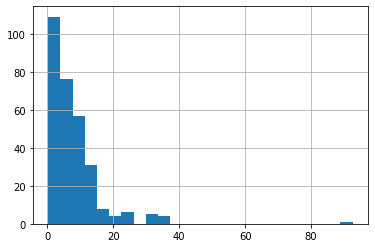

In [30]:
df['Present_Price'].hist(bins=25)

so most of our continous data is not normal , to practice regression we should have normally distributed data!, we would try to covert our skewed data into normal data using log conversions !

In [31]:

df['Kms_Driven'] = np.log(df['Kms_Driven'])
df['Present_Price'] = np.log(df['Present_Price'])

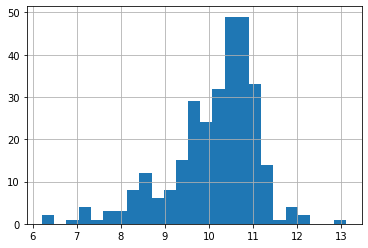

In [32]:
df['Kms_Driven'].hist(bins=25)

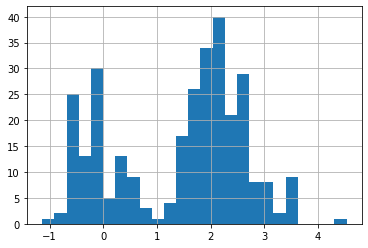

In [33]:
df['Present_Price'].hist(bins=25)

so we have roughly converted our datasets into normally distributes (roughly)

CATEGORICAL FEATURES

In [34]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

In [35]:
df[categorical_features].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [36]:
df['Car_Name'].value_counts()


city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
i20                           9
innova                        9
grand i10                     8
amaze                         7
jazz                          7
Royal Enfield Classic 350     7
sx4                           6
eon                           6
ertiga                        6
swift                         5
alto k10                      5
i10                           5
dzire                         4
Royal Enfield Thunder 350     4
wagon r                       4
Bajaj Pulsar 150              4
ritz                          4
etios liva                    4
etios cross                   3
xcent                         3
Bajaj Pulsar NS 200           3
Bajaj Avenger 220             3
TVS Apache RTR 160            3
Royal Enfield Thunder 500     3
                             ..
KTM RC39

In [37]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [38]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [39]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

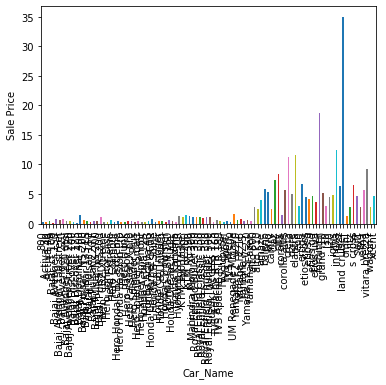

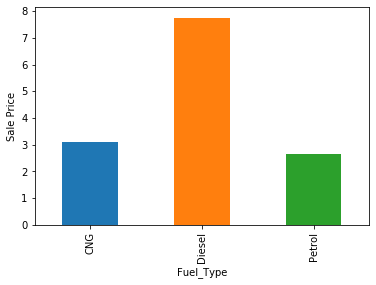

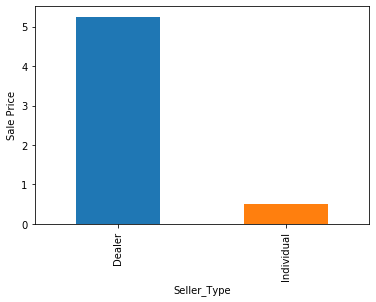

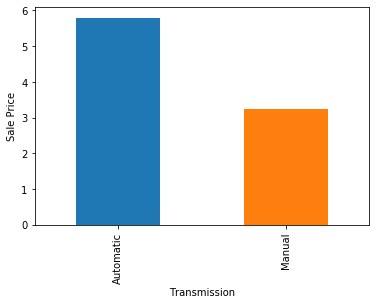

In [40]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

SO this is enough EDA for our dataset , now we would do some feature engineering

# FEATURE ENGINNERING

first thing that we dont need here is name of the car 

In [41]:
df = df.drop('Car_Name',axis = 1)

In [42]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_diff
0,3.35,1.720979,10.203592,Petrol,Dealer,Manual,0,6
1,4.75,2.255493,10.668955,Diesel,Dealer,Manual,0,7
2,7.25,2.287471,8.839277,Petrol,Dealer,Manual,0,3
3,2.85,1.423108,8.556414,Petrol,Dealer,Manual,0,9
4,4.60,1.927164,10.656082,Diesel,Dealer,Manual,0,6


In [43]:
final_dataset = df

In [44]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [45]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,1.720979,10.203592,0,6,0,1,0,1
1,4.75,2.255493,10.668955,0,7,1,0,0,1
2,7.25,2.287471,8.839277,0,3,0,1,0,1
3,2.85,1.423108,8.556414,0,9,0,1,0,1
4,4.60,1.927164,10.656082,0,6,1,0,0,1


In [46]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'year_diff',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [47]:
x = final_dataset[['Present_Price', 'Kms_Driven', 'Owner', 'year_diff',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]
y = final_dataset['Selling_Price']

In [48]:
x.head()

,Present_Price,Kms_Driven,Owner,year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.720979,10.203592,0,6,0,1,0,1
1,2.255493,10.668955,0,7,1,0,0,1
2,2.287471,8.839277,0,3,0,1,0,1
3,1.423108,8.556414,0,9,0,1,0,1
4,1.927164,10.656082,0,6,1,0,0,1


In [50]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [52]:
final_dataset.to_csv('file.csv')

In [53]:
x = final_dataset[['Present_Price', 'Kms_Driven', 'Owner',
       'year_diff', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual']]

y = final_dataset['Selling_Price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [55]:
x_train.head()

,Present_Price,Kms_Driven,Owner,year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,2.028148,11.259735,0,6,1,0,0,1
283,2.468100,9.106090,0,4,0,1,0,1
44,0.989541,10.819778,0,8,0,1,0,1
245,2.240710,11.170435,0,8,1,0,0,1
191,-0.562119,10.126631,1,8,0,1,1,1


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor()
boost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
boost.score(x_test,y_test)

0.921426886307747